<a href="https://colab.research.google.com/github/richienrg/CardTamper/blob/main/PanCardTamperingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
original = Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg", stream=True).raw)
tampered = Image.open(requests.get("https://editor.analyticsvidhya.com/uploads/83117tampered.png", stream=True).raw)

In [ ]:
# check the format and size
print("Original image format: ", original.format)
print("Tampered image format: ", tampered.format)

Original image format:  JPEG
Tampered image format:  PNG


In [ ]:
print("Original image size: ", original.size)
print("Tampered image size: ", tampered.size)

Original image size:  (1200, 800)
Tampered image size:  (250, 160)


In [ ]:
# resize original to match tampered
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')

tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


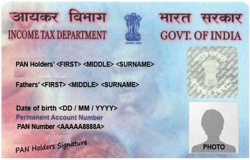

In [ ]:
original

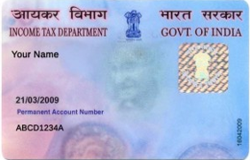

In [ ]:
tampered

In [ ]:
original = cv2.imread("pan_card_tampering/image/original.png")
tampered = cv2.imread("pan_card_tampering/image/tampered.png")

In [ ]:
original_grey = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_grey = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
# computer the structural similarity 
(score, diff) = structural_similarity(original_grey, tampered_grey, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31678790332739426


In [ ]:
# calculating the threshold and contour of images
# the threshhold function of computer vision which applies an adaptive threshold to the image
# which is stored in the form of an array
# This function transforms the grayscale image into a binary image using an in-built mathematical formulaa

# find contours works on the binary image to retrieve the contours.  These contours are a useful tool for shape
# analysis and recognition.  Grab contours grabs the appropriate value of the contours.
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# creating a bounding rectangle - bounding rectangle helps in finding the ratio of width to height
# of the object.  We compute the boudning box of the contour and then draw the bounding box on both input images
# to represent where the two images are different or not

# loop over the contours
for c in cnts: 
  #apply contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + y, w + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + y, w + h), (0, 0, 255), 2)

Original Format Image


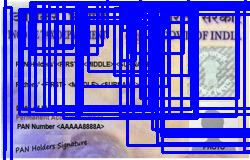

In [ ]:
# visualise the images: original
print("Original Format Image")
Image.fromarray(original)

Tampered Image


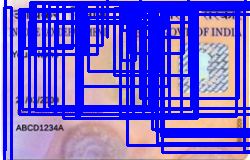

In [ ]:
print("Tampered Image")
Image.fromarray(tampered)

Difference Between


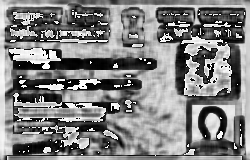

In [ ]:
print("Difference Between")
Image.fromarray(diff)
# the black and white being the differences

Threshold


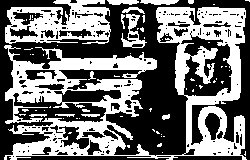

In [ ]:
print("Threshold")
Image.fromarray(thresh)
# the white and black being the differences